To run this code you are going to have to create a virtual enviornment, and then install libraries in that virtual enviornment.

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import pad_sequences
import pandas as pd

df = pd.read_csv('data/ham-vs-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [6]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [7]:
X = df['Text']
y = df['IsSpam']

X_text = X

In [8]:
import keras 

max_words = 20000
max_length = 500
 
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)

X = keras.utils.pad_sequences(sequences, maxlen=max_length)
print(X.shape)

(999, 500)


In [9]:
first_document_tokens = X[0] 
for ix in first_document_tokens:
    try:
        print(ix, tokenizer.index_word[ix])
    except:
        pass

604 key
144 issues
166 going
5753 forwarda
123 year
203 end
1277 reviews
141 report
459 needs
1527 generating
55 like
817 mid
123 year
4422 documenting
67 business
504 unit
380 performance
167 review
1890 completion
134 david
121 john
113 work
31 out
135 plan
397 generation
3 for
1 the
5754 nim
144 issues
855 employees
134 david
121 john
381 hpl
1000 transition
144 issues
1891 ongoing
2221 officially
953 transferred
2222 regardsdelainey


In [10]:
X_text[0]

'key issues going forwarda year end reviews report needs generating like mid year documenting business unit performance review completion david john work out plan generation for the nim issues employees david john hpl transition issues ongoing officially transferred regardsdelainey'

In [11]:

model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           640000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 128)               2048128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,688,257
Trainable params: 2,688,257
Non-trainable params: 0
_________________________________________________________________


2022-10-18 14:53:43.355687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.

In [12]:
# https://www.tensorflow.org/text/guide/word_embeddings
embedding_layer = Embedding(max_words, 32, input_length=max_length)
embedding_layer(X[0])

<tf.Tensor: shape=(500, 32), dtype=float32, numpy=
array([[-0.02049553, -0.02695425, -0.01555074, ...,  0.03139217,
         0.03338884,  0.01152526],
       [-0.02049553, -0.02695425, -0.01555074, ...,  0.03139217,
         0.03338884,  0.01152526],
       [-0.02049553, -0.02695425, -0.01555074, ...,  0.03139217,
         0.03338884,  0.01152526],
       ...,
       [ 0.02602316,  0.02507647, -0.03376352, ..., -0.04978791,
        -0.04838909,  0.0334493 ],
       [ 0.014298  , -0.03897952,  0.03265046, ...,  0.03540099,
        -0.00783032,  0.04098997],
       [-0.04122814, -0.03707061, -0.02434843, ...,  0.01075182,
        -0.03893123,  0.00335512]], dtype=float32)>

In [13]:
hist = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=20)

Epoch 1/10


/Users/zacharydesario/research/NN_with_tf_3/env/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


40/40 [==============================] - 1s 17ms/step - loss: 0.6466 - accuracy: 0.6133 - val_loss: 0.8515 - val_accuracy: 0.0000e+00
Epoch 2/10
40/40 [==============================] - 0s 10ms/step - loss: 0.3200 - accuracy: 0.8798 - val_loss: 0.7186 - val_accuracy: 0.5050
Epoch 3/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0679 - accuracy: 0.9862 - val_loss: 0.3405 - val_accuracy: 0.8400
Epoch 4/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0211 - accuracy: 0.9962 - val_loss: 0.3797 - val_accuracy: 0.8100
Epoch 5/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2428 - val_accuracy: 0.8900
Epoch 6/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.2653 - val_accuracy: 0.8750
Epoch 7/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 0.8850
Epoch 8/10
40/40 [==

[]

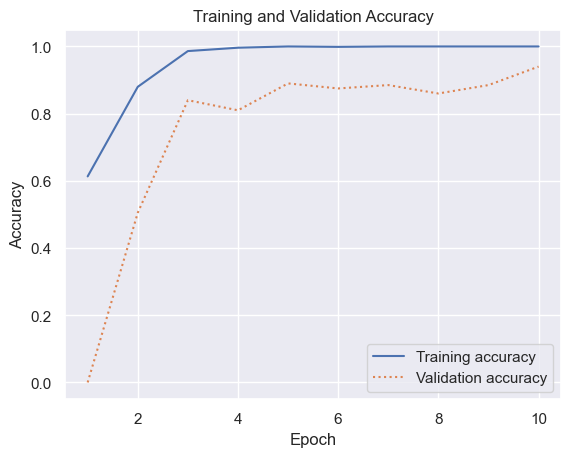

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [15]:
cleaned_text = 'Why pay more for expensive meds when you can order them online and save $$$?'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

1/1 [==============================] - 0s 74ms/step


0.9802105

In [16]:
print('sequence:\n', sequence)
print('-'*79)
print('padded_sequence:\n', padded_sequence)
print('-'*79)

for ix in sequence[0]:
    print( 'index position of word in tokenizer:', ix, ',  word:', tokenizer.index_word[ix])

sequence:
 [[525, 187, 29, 3, 1370, 737, 111, 4, 23, 109, 106, 165, 2, 329]]
-------------------------------------------------------------------------------
padded_sequence:
 [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  

In [17]:
cleaned_text = 'hey jon, I cannot make the meeting tomorrow. can you please send me a time that you can meet on tuesday. thanks, harry'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)


1/1 [==============================] - 0s 22ms/step


array([[0.00996811]], dtype=float32)

In [18]:
cleaned_text = 'Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)

1/1 [==============================] - 0s 23ms/step


array([[0.13825096]], dtype=float32)

In [19]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
 
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_length))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           640000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                

In [20]:
hist = model.fit(X, y, validation_split=0.2, epochs=6, batch_size=20)

Epoch 1/6


/Users/zacharydesario/research/NN_with_tf_3/env/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


40/40 [==============================] - 1s 22ms/step - loss: 0.6532 - accuracy: 0.6233 - val_loss: 0.9333 - val_accuracy: 0.0000e+00
Epoch 2/6
40/40 [==============================] - 1s 15ms/step - loss: 0.5207 - accuracy: 0.6508 - val_loss: 0.7561 - val_accuracy: 0.5300
Epoch 3/6
40/40 [==============================] - 1s 15ms/step - loss: 0.2567 - accuracy: 0.9462 - val_loss: 0.3320 - val_accuracy: 0.9500
Epoch 4/6
40/40 [==============================] - 1s 15ms/step - loss: 0.0560 - accuracy: 0.9912 - val_loss: 0.1322 - val_accuracy: 0.9750
Epoch 5/6
40/40 [==============================] - 1s 15ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.1416 - val_accuracy: 0.9600
Epoch 6/6
40/40 [==============================] - 1s 15ms/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.1016 - val_accuracy: 0.9700


In [25]:
cleaned_text = 'Why pay more for expensive meds when you can order them online and save $$$?'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)

1/1 [==============================] - 0s 26ms/step


array([[0.9545564]], dtype=float32)

In [22]:
cleaned_text = 'hey jon, I cannot make the meeting tomorrow. can you please send me a time that you can meet on tuesday. thanks, harry'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)



1/1 [==============================] - 0s 22ms/step


array([[0.03655041]], dtype=float32)

In [23]:
cleaned_text = 'Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = keras.utils.pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)

1/1 [==============================] - 0s 37ms/step


array([[0.8302307]], dtype=float32)

In [24]:
for ix in sequence[0]:
    print( ix, tokenizer.index_word[ix])

23 can
4 you
982 attend
847 code
167 review
391 tuesday
49 need
99 make
668 sure
1 the
4163 rock
1845 solid
